In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

In [4]:
folder = "20220801_220140_5dB_5.0-5.5V_8.5-11.0"
filename = "20220801_220140_5dB_5.0V.csv"
file_day = "20220801_220140_5dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/Result/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',', usecols=[0,1,2,3,4,5])
all_freq = df.iloc[16:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

dB = 5
print(dB)
minV = float(df.iat[0,5])
maxV = float(df.iat[1,5])
numV = int(df.iat[2,5])
v = np.linspace(minV, maxV, numV)
print(minV, maxV, v)


16           8.5
17       8.50125
18        8.5025
19       8.50375
20         8.505
          ...   
2012      10.995
2013    10.99625
2014     10.9975
2015    10.99875
2016          11
Name: Unnamed: 1, Length: 2001, dtype: object 16    8.5
Name: Unnamed: 1, dtype: object 2016    11
Name: Unnamed: 1, dtype: object
5
5.0 5.5 [5.    5.025 5.05  5.075 5.1   5.125 5.15  5.175 5.2   5.225 5.25  5.275
 5.3   5.325 5.35  5.375 5.4   5.425 5.45  5.475 5.5  ]


In [99]:
from re import I
from cv2 import phase
from numpy import diff


phase = {}
list_pha = {}
diff = {}
for m,n in enumerate(v):
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/Result/" + folder + "/" + filename
    phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
    
print(phase)
print(diff)


# for m,n in enumerate(v):
    # print(list_pha[m-1])
    # diff[n] = abs(list_pha[m]-list_pha[m-1])
    
   
    # all_freq = df.iloc[17:,1]
# print(diff)
# print(phase[0.02])

{5.0: array([-107.8661 , -115.1628 , -130.5604 , ...,  -70.44896,  -70.87299,
        -69.50958]), 5.025: array([-126.0086 , -126.9702 , -110.0471 , ...,  -68.79946,  -71.41998,
        -70.11088]), 5.05: array([-135.9764 , -125.2543 , -110.7029 , ...,  -71.46116,  -71.45642,
        -70.7562 ]), 5.075: array([-117.1181 , -157.1048 , -145.4325 , ...,  -71.88857,  -70.19749,
        -75.77946]), 5.1: array([-146.9667 , -153.186  , -135.339  , ...,  -88.4687 ,  -86.73919,
        -87.70131]), 5.125: array([-130.362 , -128.134 , -118.1748, ..., -100.7619, -103.6305,
       -106.4932]), 5.15: array([-115.805 , -119.27  , -129.6687, ...,  165.4835,  167.1013,
        172.3402]), 5.175: array([-153.5365 , -151.0633 , -150.232  , ...,   70.18848,   64.27142,
         68.10049]), 5.2: array([-133.7684, -130.6225, -138.3117, ...,  115.4601,  117.4373,
        123.0947]), 5.225: array([-103.8501 , -123.2673 , -123.2232 , ...,  -77.59689,  -79.9509 ,
        -79.71789]), 5.25: array([-125.3339 , 

In [4]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[1], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array)

float64
[ 8.     8.001  8.002 ...  9.998  9.999 10.   ]


[[171.2801 170.2743 168.8056 172.1993 172.0036]
 [170.189  170.6781 176.9873 173.0854 177.3379]
 [168.9146 169.1909 173.4747 178.028  174.3382]
 ...
 [141.4594 113.2494 133.1752 144.6955 129.7957]
 [140.0329 112.8977 128.875  134.9764 134.0349]
 [132.3103 121.1102 125.8912 137.9464 139.3049]]


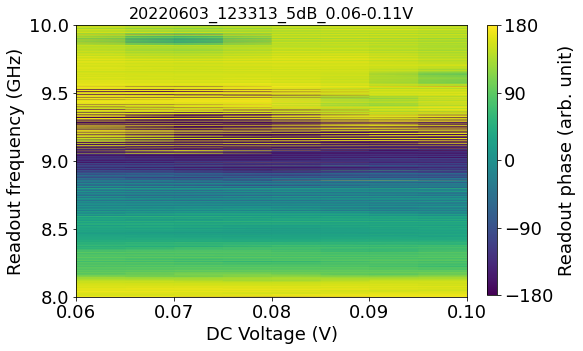

In [46]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    Z[i] = phase[x[i]]
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, shading='gouraud', vmin=-180, vmax=180)
hoge00.set_clim(-180, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title(folder, size=16)
ax.set_xlabel('DC Voltage (V)')
ax.set_ylabel('Readout frequency (GHz)')
cbar.set_label("Readout phase (arb. unit)") #カラーバーのラベル


plt.show()
del plt


In [26]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[3], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array.dtype)

float64
float64


[171.002   175.1801  176.1786  ...  88.43862  95.02953  97.06135]


c:\Users\super\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

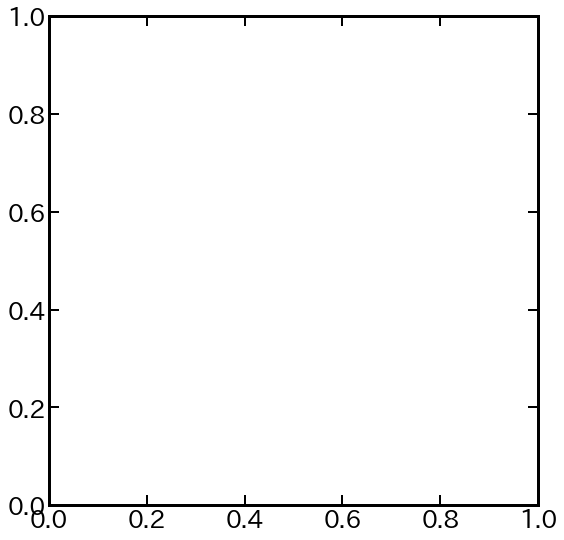

In [5]:
# カラーマップを作成する 河合カラーマップ変形
gamma = 10.0
v_vertical = 1.0
# t_array = np.linspace(-1.0, 1.0, 1001)
v_array = np.array(v, dtype=float)
# v_parallel_array = np.linspace(-1.0, 1.0, 1001)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[3], delimiter=',', unpack=True)
freq_array = np.array(freq_array, dtype=float)
print(freq_array)
v_array, freq_array = np.meshgrid(v_array, freq_array)  # 配列の要素から格子列
p_array = (
    1.0
    - np.square(
        np.cos(
            gamma
            * v_array
            * np.sqrt(np.square(freq_array) + np.square(v_vertical))
        )
    )
    - (
        np.square(freq_array)
        / (np.square(freq_array) + np.square(v_vertical))
    )
    * np.square(
        np.sin(
            gamma
            * v_array
            * np.sqrt(np.square(freq_array) + np.square(v_vertical))
        )
    )
)
graph = GraphUtility()  # GraphUtilityのインスタンスの作成
graph.make_color_map(
    p_array, x_axis_min=minV, x_axis_max=maxV, y_axis_min=freq_start, y_axis_max=freq_end
)  # カラーマップを作成
graph.show()  # グラフを表示する
del graph  # インスタンスを削除する


[[-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 ...
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]] 1001


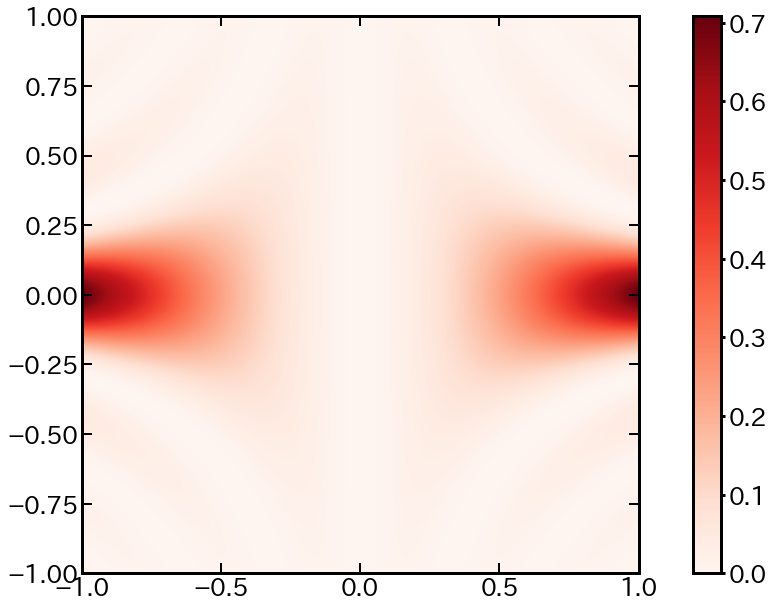

In [5]:
# カラーマップを作成する 河合マップ原型
gamma = 10.0
v_vertical = 0.1
t_array = np.linspace(-1.0, 1.0, 1001)
v_parallel_array = np.linspace(-1.0, 1.0, 1001)
t_array, v_parallel_array = np.meshgrid(t_array, v_parallel_array)  # 配列の要素から格子列
print(t_array, len(t_array))
p_array = (
    1.0
    - np.square(
        np.cos(
            gamma
            * t_array
            * np.sqrt(np.square(v_parallel_array) + np.square(v_vertical))
        )
    )
    - (
        np.square(v_parallel_array)
        / (np.square(v_parallel_array) + np.square(v_vertical))
    )
    * np.square(
        np.sin(
            gamma
            * t_array
            * np.sqrt(np.square(v_parallel_array) + np.square(v_vertical))
        )
    )
)
graph = GraphUtility()  # GraphUtilityのインスタンスの作成
graph.make_color_map(
    p_array, x_axis_min=-1.0, x_axis_max=1.0, y_axis_min=-1.0, y_axis_max=1.0
)  # カラーマップを作成
graph.show()  # グラフを表示する
del graph  # インスタンスを削除する
